<a href="https://colab.research.google.com/github/jaozatulzahra19/Proyek-3/blob/main/Proyek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow as keras
import os
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir='/content/drive/MyDrive/proyek_3/dataset/train'
Labels = ['Penyakit Herpes', 'Penyakit Kudis', 'Penyakit Kurap', 'Penyakit Panu']
print ("class : ")
for i in range(len(Labels)):
    print (i, end = " ")
    print (Labels[i])

class : 
0 Penyakit Herpes
1 Penyakit Kudis
2 Penyakit Kurap
3 Penyakit Panu


In [ ]:
print('Number of classes:',len(Labels))

Number of classes: 4


In [ ]:
module_selection = ("mobilenet_v2", 224, 1280)
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest',
      validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset="training",
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle=False,
    seed=42,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 337 images belonging to 4 classes.
Found 141 images belonging to 4 classes.


In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,input_shape=IMAGE_SIZE+(3,), output_shape=[FV_SIZE])
do_fine_tuning = False
if do_fine_tuning:
  feature_extractor.trainable = True
  for layer in base_model.layers[-30:]:
    layer.trainable =True

else:
  feature_extractor.trainable = False

print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax',
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 2915908 (11.12 MB)
Trainable params: 657924 (2.51 MB)
Non-trainable params: 2257984 (8.

In [ ]:
LEARNING_RATE = 0.001
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
EPOCHS=29
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/29
21/21 [==============================] - 132s 6s/step - loss: 1.8618 - accuracy: 0.3988 - val_loss: 1.3602 - val_accuracy: 0.4375
Epoch 2/29
21/21 [==============================] - 7s 348ms/step - loss: 1.1161 - accuracy: 0.5234 - val_loss: 1.4532 - val_accuracy: 0.4141
Epoch 3/29
21/21 [==============================] - 9s 411ms/step - loss: 0.8730 - accuracy: 0.6573 - val_loss: 1.3447 - val_accuracy: 0.4297
Epoch 4/29
21/21 [==============================] - 8s 386ms/step - loss: 0.7193 - accuracy: 0.7009 - val_loss: 1.3360 - val_accuracy: 0.4453
Epoch 5/29
21/21 [==============================] - 8s 376ms/step - loss: 0.7687 - accuracy: 0.7227 - val_loss: 1.6746 - val_accuracy: 0.3984
Epoch 6/29
21/21 [==============================] - 9s 416ms/step - loss: 0.7144 - accuracy: 0.7072 - val_loss: 1.4232 - val_accuracy: 0.4375
Epoch 7/29
21/21 [==============================] - 7s 360ms/step - loss: 0.6099 - accuracy: 0.7664 - val_loss: 1.4780 - val_accuracy: 0.5078
Epoch 8

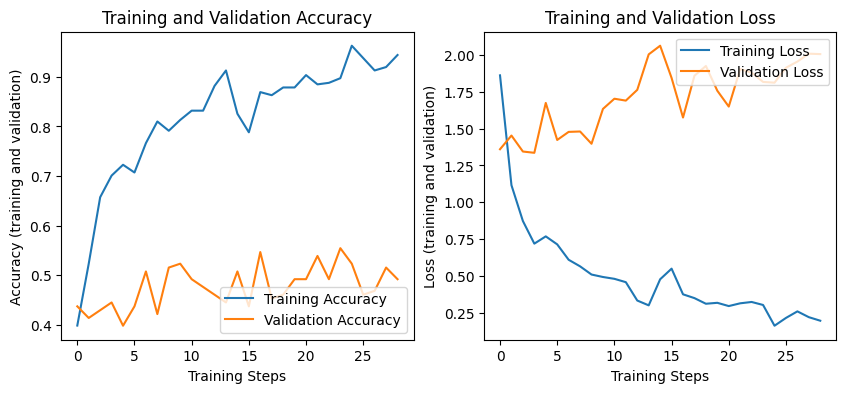

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

1/1 [==============================] - 0s 459ms/step
class: Penyakit Kurap, confidence: 0.907892


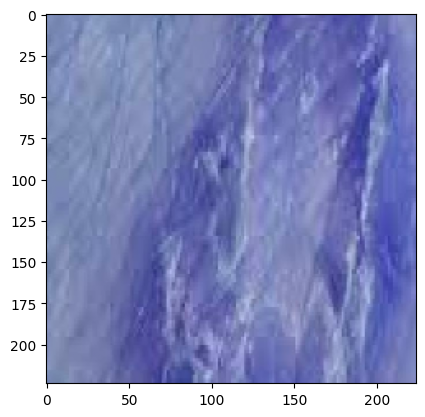

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 32ms/step
class: Penyakit Kurap, confidence: 0.523441


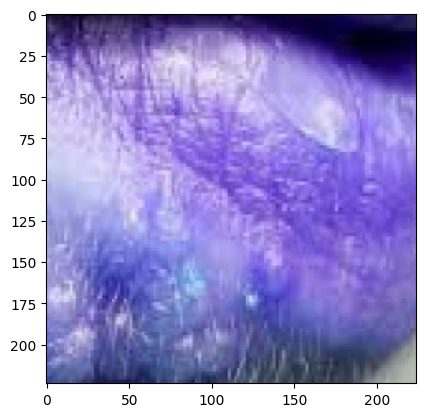

1/1 [==============================] - 0s 20ms/step
class: Penyakit Panu, confidence: 0.852645


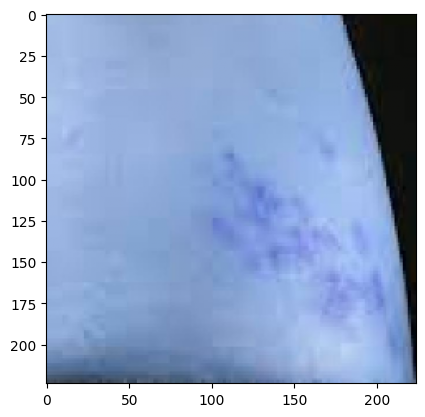

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 23ms/step
class: Penyakit Kurap, confidence: 0.604789


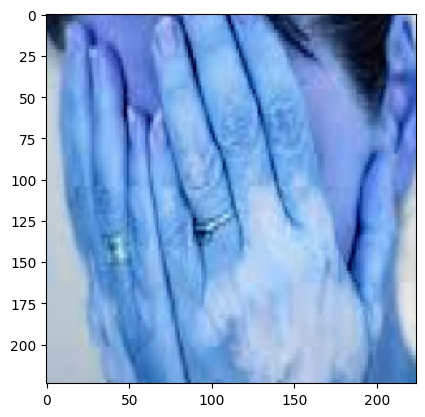

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 36ms/step
class: Penyakit Panu, confidence: 0.983667


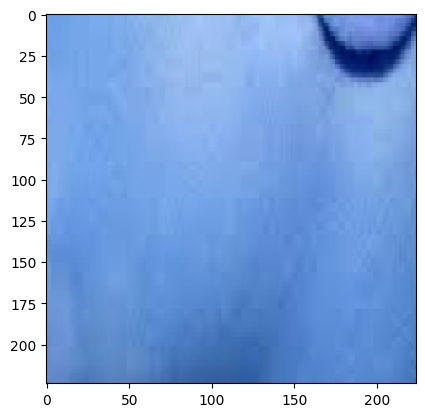

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 30ms/step
class: Penyakit Panu, confidence: 0.870111


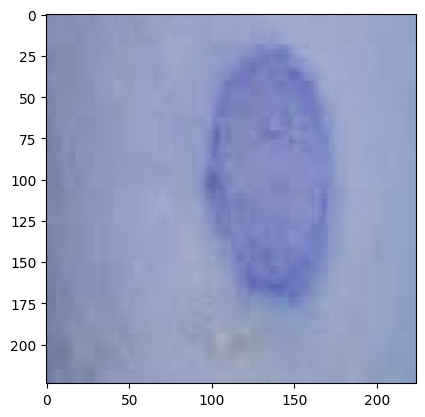

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 31ms/step
class: Penyakit Kurap, confidence: 0.964029


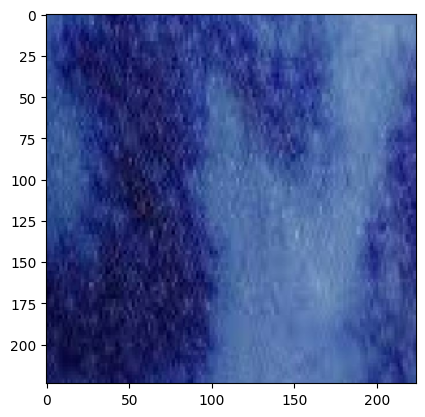

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 44ms/step
class: Penyakit Panu, confidence: 0.458236


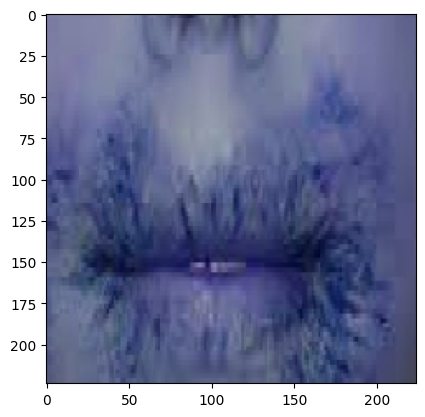

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 34ms/step
class: Penyakit Panu, confidence: 0.537856


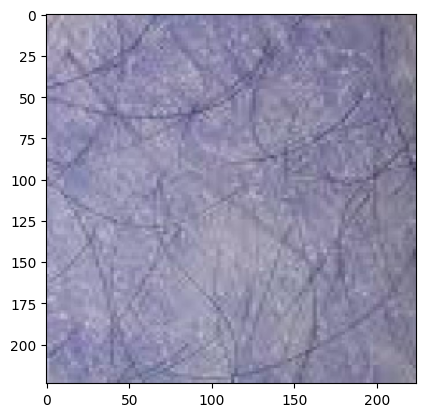

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 30ms/step
class: Penyakit Panu, confidence: 0.949271


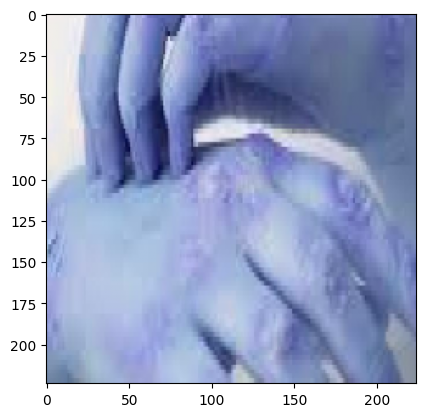

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 41ms/step
class: Penyakit Panu, confidence: 0.977630


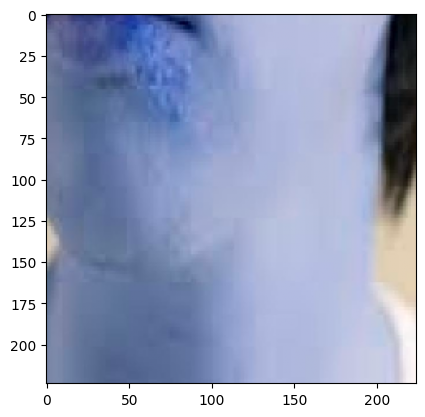

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 51ms/step
class: Penyakit Panu, confidence: 0.681763


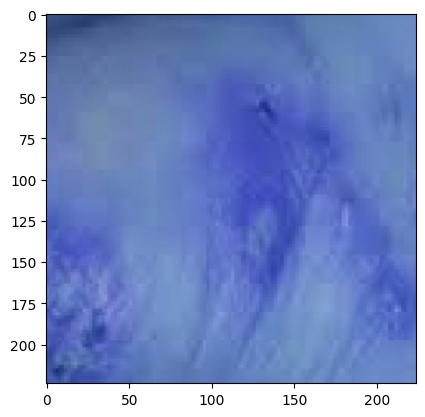

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 43ms/step
class: Penyakit Panu, confidence: 0.938471


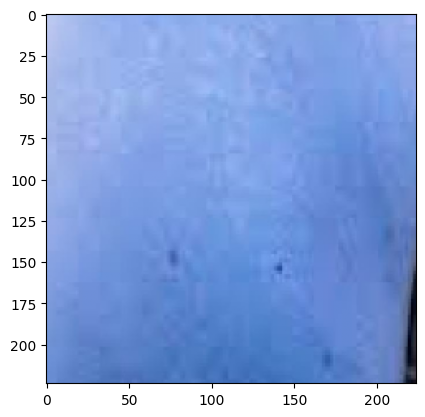

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 39ms/step
class: Penyakit Panu, confidence: 0.816656


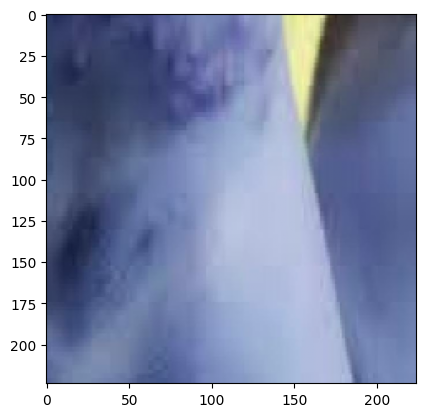

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 22ms/step
class: Penyakit Kurap, confidence: 0.866835


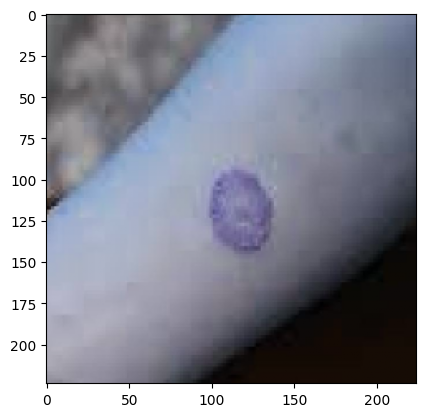

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 28ms/step
class: Penyakit Panu, confidence: 0.988348


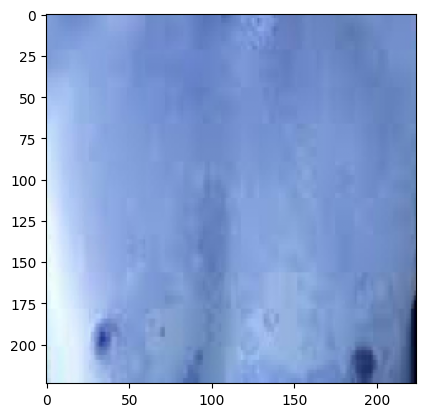

<Figure size 640x480 with 0 Axes>

In [ ]:
import random
import cv2
def upload(filename):
    img = cv2.imread(os.path.join(train_dir, filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    return img

def pre_result(image):
    x = model.predict(np.asarray([img]))[0]
    classx = np.argmax(x)
    return {Labels[classx]: x[classx]}
images = random.sample(validation_generator.filenames, 16)

for idx, filename in enumerate(images):
    img = upload(filename)
    prediction = pre_result(img)
    print("class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y)
df = pd.DataFrame(cm, columns=validation_generator.class_indices)
plt.figure(figsize=(10,7))
sn.heatmap(df, annot=True)

Confusion Matrix


NameError: name 'confusion_matrix' is not defined

In [ ]:
import time
t = time.time()
export_path = "/tmp/saved_models/{}".format(int(t))
tf.keras.models.save_model(model, export_path)
export_path

'/tmp/saved_models/1718871151'

In [ ]:
# Now confirm that we can reload it, and it still gives the same results
reloaded = tf.keras.models.load_model(export_path, custom_objects={'KerasLayer':hub.KerasLayer})
def predict_reload(image):
    probabilities = reloaded.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    return {Labels[class_idx]: probabilities[class_idx]}

SOURCE: class: Penyakit Kurap, file: Penyakit Kurap/penyakit_kurap-23-_jpeg.rf.d0652c4f7556d3b56db4ea08d6178f3c.jpg
1/1 [==============================] - 0s 471ms/step
PREDICTED: class: Penyakit Herpes, confidence: 0.467917


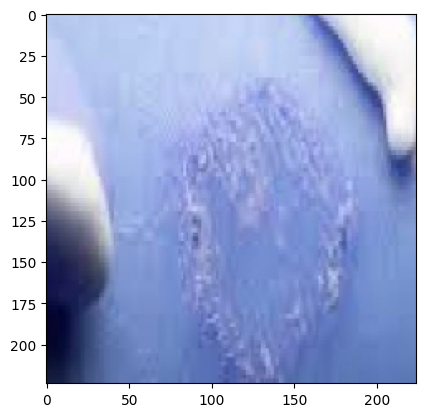

<Figure size 640x480 with 0 Axes>

SOURCE: class: Penyakit Herpes, file: Penyakit Herpes/penyakit_herpes-21-_jpeg.rf.fc77540f36dc2020833e21ffae086688.jpg
1/1 [==============================] - 0s 22ms/step
PREDICTED: class: Penyakit Panu, confidence: 0.889109


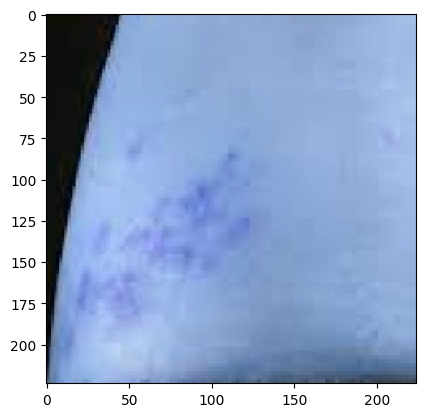

In [ ]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 2)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    img = upload(filename)
    prediction = predict_reload(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)
    plt.show()

In [ ]:
# convert the model to TFLite
!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/model.tflite"

# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : reloaded(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)
# Convert the model to standard TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

11546924